# Atelier 2 : Apprentissage supervisé avec Python -- Ghofrane EL MESSI

In [95]:
import numpy as np 

import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion 
import pickle

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, precision_score, accuracy_score, cohen_kappa_score, make_scorer
import time

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

## I. Apprentissage supervisé : Feature engineering et Classification

### 1- Chargement des données et préparation :

In [5]:
#importer les données
credit=pd.read_csv(r"C:\Users\ghofr\OneDrive\Bureau\TP-AS\TP AS\credit_scoring.csv",sep=";",header=0)

In [6]:
credit.head()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


In [7]:
credit.shape

(4375, 14)

<AxesSubplot:>

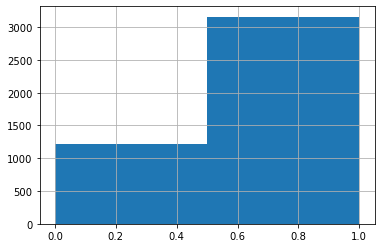

In [8]:
credit['Status'].hist(bins=2)

In [9]:
X=credit.iloc[:,:13].values
Y=credit.iloc[:,13].values

In [10]:
print("La taille de X : ", X.shape)
print("La taille de Y : ", Y.shape)

La taille de X :  (4375, 13)
La taille de Y :  (4375,)


In [11]:
#séparation des données en données d'apprentissage et données de test
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.5,random_state=1) 

### 2- Apprentissage et évaluation de modèles :

In [12]:
def evaluation_classification(model, Xtrain,Xtest,Ytrain,Ytest):
    model.fit(Xtrain,Ytrain)
    Y_predict=model.predict(Xtest)
    print("Precision : ", precision_score(Ytest,Y_predict))
    print("Rappel : ", recall_score(Ytest,Y_predict))
    print("Accuracy : ", accuracy_score(Ytest,Y_predict))
    print("Matrice de confusion : \n")
    print(confusion_matrix(Ytest,Y_predict))

### Un arbre CART (random_state=1)

In [13]:
DT = DecisionTreeClassifier(random_state=1)
evaluation_classification(DT, Xtrain,Xtest,Ytrain,Ytest)

Precision :  0.8194174757281554
Rappel :  0.7992424242424242
Accuracy :  0.7271480804387569
Matrice de confusion : 

[[ 325  279]
 [ 318 1266]]


### k-plus-proches-voisins avec k=5

In [14]:
KNN = KNeighborsClassifier(n_neighbors=5)
evaluation_classification(KNN, Xtrain,Xtest,Ytrain,Ytest)

Precision :  0.7709713024282561
Rappel :  0.8819444444444444
Accuracy :  0.7248628884826326
Matrice de confusion : 

[[ 189  415]
 [ 187 1397]]


### MultilayerPerceptron à deux couches de tailles respectives 40 et 20 et random_state=1

In [15]:
MLP = MLPClassifier(hidden_layer_sizes = (40,20), random_state = 1)
evaluation_classification(MLP, Xtrain,Xtest,Ytrain,Ytest)

Precision :  0.8133159268929504
Rappel :  0.7866161616161617
Accuracy :  0.7148080438756855
Matrice de confusion : 

[[ 318  286]
 [ 338 1246]]


### Choix meilleur critère entre le Rappel et la Précision 

Il est plus judicieux d'utiliser la précision lorsque le risque d'un faux positif est élevé alors que le rappel est plus judicieux lorsque le risque d'un faux négatif est élevé (exemple utilisation dans le médical pour la détection de maladie).

Dans notre cas, on cherche à prédir la variable Y qui désigne si on doit accorder le crédit à un individu. Un faux positif dans notre cas veut dire qu'on accordera un crédit à une personne qui à un risque élevé de ne pas le payer. Tandis qu'un faux négatif veut dire qu'on réfusera d'accorder un crédit à une personne de faible risque. 

En effet dans notre cas, le choix de la meuilleur métrique entre rappel et précision dépend de la politique de la banque en question ainsi que la nature du crédit ( crédit immobilier,crédit à long terme...).

Dans notre cas, on va choisir la précision comme métrique d'évaluation en supposant que le risque d'un faux positif est plus elevé qu'un faux négatif. Cependant, on peut aussi utiliser un F1 score qui permettra de moyenner les deux effets.



### 2- Normalisation des variables continues :

#### StandardScaler

In [16]:
N=StandardScaler()
N.fit(Xtrain)
Xtrain_normalise=N.transform(Xtrain)
Xtest_normalise=N.transform(Xtest)

#### DecisionTree

In [17]:
DT = DecisionTreeClassifier(random_state=1)
evaluation_classification(DT, Xtrain_normalise,Xtest_normalise,Ytrain,Ytest)

Precision :  0.8181818181818182
Rappel :  0.8011363636363636
Accuracy :  0.7271480804387569
Matrice de confusion : 

[[ 322  282]
 [ 315 1269]]


#### KNN

In [18]:
KNN = KNeighborsClassifier(n_neighbors=5)
evaluation_classification(KNN, Xtrain_normalise,Xtest_normalise,Ytrain,Ytest)

Precision :  0.8106015485407981
Rappel :  0.8592171717171717
Accuracy :  0.7527422303473492
Matrice de confusion : 

[[ 286  318]
 [ 223 1361]]


#### MLP

In [19]:
MLP = MLPClassifier(hidden_layer_sizes = (40,20), random_state = 1)
evaluation_classification(MLP,Xtrain_normalise,Xtest_normalise,Ytrain,Ytest)

Precision :  0.8381717109326745
Rappel :  0.8566919191919192
Accuracy :  0.776508226691042
Matrice de confusion : 

[[ 342  262]
 [ 227 1357]]


#### MinMax scaler

In [20]:
Nminmax=MinMaxScaler()
Nminmax.fit(Xtrain)
Xtrain_min_max=Nminmax.transform(Xtrain)
Xtest_min_max=Nminmax.transform(Xtest)


#### DecisionTree

In [21]:
evaluation_classification(DT,Xtrain_min_max,Xtest_min_max,Ytrain,Ytest)

Precision :  0.8197674418604651
Rappel :  0.8011363636363636
Accuracy :  0.7285191956124314
Matrice de confusion : 

[[ 325  279]
 [ 315 1269]]


#### KNN

In [22]:
evaluation_classification(KNN,Xtrain_min_max,Xtest_min_max,Ytrain,Ytest)

Precision :  0.8076692630317556
Rappel :  0.851010101010101
Accuracy :  0.7454296160877514
Matrice de confusion : 

[[ 283  321]
 [ 236 1348]]


#### MLP

In [23]:
evaluation_classification(MLP,Xtrain_min_max,Xtest_min_max,Ytrain,Ytest)

Precision :  0.832345971563981
Rappel :  0.8869949494949495
Accuracy :  0.7888482632541134
Matrice de confusion : 

[[ 321  283]
 [ 179 1405]]


Conclusion:

La normalisation semble améliorer toutes les métriques pour l'arbre de décision. Pour les autres modèles, toutes les métriques sauf le rappel sont améliorés. 

Il n y a pas de grandes différences entre les deux mèthodes de normalisation.

Normalisation améliore globalement les performances des modèles.

### 3- Création de nouvelles variables caractéristiques par combinaisons linéaires des variables initiales :

In [24]:
pca=PCA(n_components=3)
pca.fit(Xtrain_normalise)
Xtrain_pca=np.concatenate((Xtrain_min_max,pca.transform(Xtrain_min_max)),axis=1)
Xtest_pca=np.concatenate((Xtest_min_max,pca.transform(Xtest_min_max)),axis=1)

print("Arbre de décision :")
evaluation_classification(DT, Xtrain_pca,Xtest_pca,Ytrain,Ytest)
print('.........................')
print("KNN :")
evaluation_classification(KNN, Xtrain_pca,Xtest_pca,Ytrain,Ytest)
print('.........................')
print("MLP :")
evaluation_classification(MLP, Xtrain_pca,Xtest_pca,Ytrain,Ytest)

Arbre de décision :
Precision :  0.8113810741687979
Rappel :  0.8011363636363636
Accuracy :  0.7212065813528337
Matrice de confusion : 

[[ 309  295]
 [ 315 1269]]
.........................
KNN :
Precision :  0.8088757396449704
Rappel :  0.8630050505050505
Accuracy :  0.753199268738574
Matrice de confusion : 

[[ 281  323]
 [ 217 1367]]
.........................
MLP :
Precision :  0.8288393903868698
Rappel :  0.8926767676767676
Accuracy :  0.7888482632541134
Matrice de confusion : 

[[ 312  292]
 [ 170 1414]]


L'ajout de nouvelles variables à partir de combinaisons linéaires des différentes variables est partiquement sans effet sur les performances des différents modèles.

### 4- Sélection de variables :

Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


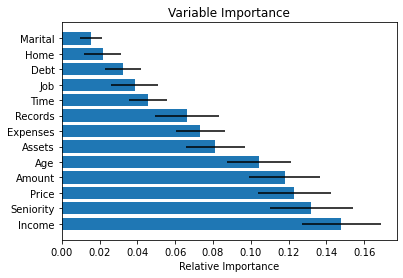

In [25]:
from sklearn.ensemble import RandomForestClassifier

nom_cols=credit.columns

clf = RandomForestClassifier(n_estimators=100)
clf.fit(Xtrain_normalise, Ytrain)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features = nom_cols

print(features[sorted_idx])


padding = np.arange(Xtrain_normalise.size/len(Xtrain_normalise)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

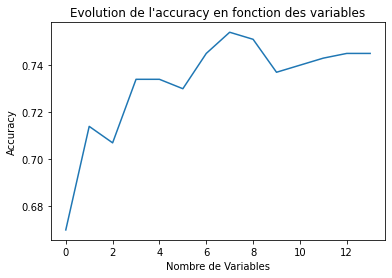

In [26]:
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(Xtrain_min_max.shape[1]+1)
for f in np.arange(0, Xtrain_min_max.shape[1]+1):
    X1_f = Xtrain_min_max[:,sorted_idx[:f+1]]
    X2_f = Xtest_min_max[:,sorted_idx[:f+1]]
    KNN.fit(X1_f,Ytrain)
    YKNN=KNN.predict(X2_f)
    scores[f]=np.round(accuracy_score(Ytest,YKNN),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

A partir du graphe ci-dessous, on voit qu'on obtient la meuilleure accuracy pour un nombre de variables égale à 7 variables.
On va donc garder les 7 variables les plus importantes en utilisant le plot d'avant.

On va garder les variables suivantes :                             
    Income                                                    
    Seniority                                                   
    Price                                                          
    Amount                                                    
    Age                                                          
    Assets                                                             
    Expenses

### 6- Paramétrage des classifieurs :

In [27]:
DT = DecisionTreeClassifier(random_state=1)

DT_param= {'criterion':['gini','entropy'],'max_depth':[3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'min_samples_split': [2,3,4,5,6]}

grid = GridSearchCV(DT, DT_param, cv=10, scoring='accuracy', return_train_score=False,verbose=1 )


grid_search=grid.fit(Xtrain_min_max, Ytrain)
print('Paramètres optimals :' , grid_search.best_params_)

Fitting 10 folds for each of 190 candidates, totalling 1900 fits
Paramètres optimals : {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}


#### Evaluation du modèle après tunning des paramètres

In [28]:
DT_optimal = KNeighborsClassifier(n_neighbors=13)
evaluation_classification(DT_optimal, Xtrain_min_max,Xtest_min_max,Ytrain,Ytest)

Precision :  0.8188745603751465
Rappel :  0.8819444444444444
Accuracy :  0.773308957952468
Matrice de confusion : 

[[ 295  309]
 [ 187 1397]]


### KNN

In [29]:
kNN = KNeighborsClassifier()

KNN_param = dict(n_neighbors=list(range(1, 20)))

grid = GridSearchCV(KNN, KNN_param, cv=10, scoring='accuracy', return_train_score=False,verbose=1)


grid_search=grid.fit(Xtrain_min_max, Ytrain)
print('Paramètre optimal :' , grid_search.best_params_)

Fitting 10 folds for each of 19 candidates, totalling 190 fits
Paramètre optimal : {'n_neighbors': 13}


#### Evaluation du modèle après tunning des paramètres

In [30]:
KNN_optimal = KNeighborsClassifier(n_neighbors=13)
evaluation_classification(KNN_optimal, Xtrain_min_max,Xtest_min_max,Ytrain,Ytest)

Precision :  0.8188745603751465
Rappel :  0.8819444444444444
Accuracy :  0.773308957952468
Matrice de confusion : 

[[ 295  309]
 [ 187 1397]]


### MLP

In [31]:
MLP = MLPClassifier(hidden_layer_sizes = (40,20), random_state = 1)

MLP_param = {'hidden_layer_sizes':[(50,20),(50,30),(50,40),(50,50),(40,20),(40,30),(40,40),(30,20),(20,20)]}

grid = GridSearchCV(MLP, MLP_param, cv=10, scoring='accuracy', return_train_score=False,verbose=1 )

grid_search=grid.fit(Xtrain_min_max, Ytrain)
print('Paramètre optimal :' , grid_search.best_params_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Paramètre optimal : {'hidden_layer_sizes': (20, 20)}


#### Evaluation du modèle après tunning des paramètres

In [32]:
MLP_optimal = MLPClassifier(hidden_layer_sizes = (20,20), random_state = 1)
evaluation_classification(MLP_optimal , Xtrain_min_max,Xtest_min_max,Ytrain,Ytest)

Precision :  0.8233601841196778
Rappel :  0.9034090909090909
Accuracy :  0.7897623400365631
Matrice de confusion : 

[[ 297  307]
 [ 153 1431]]


### 7- Création d’un pipeline :

In [33]:
pipeline = Pipeline(memory=None,steps=[
    ('MinMax', MinMaxScaler()),
    ('FU', FeatureUnion( [ ('MinMax', MinMaxScaler()), ('pca', PCA()) ] )), 
    ('clf', DecisionTreeClassifier(random_state=1))] )
pipeline.fit(Xtrain, Ytrain)
pickle.dump(pipeline, open('pipeline', 'wb'))

In [34]:
loaded_model = pickle.load(open('pipeline', 'rb'))
evaluation_classification(loaded_model, Xtrain,Xtest, Ytrain, Ytest)

Precision :  0.8135922330097087
Rappel :  0.7935606060606061
Accuracy :  0.7189213893967094
Matrice de confusion : 

[[ 316  288]
 [ 327 1257]]


### 8- Comparaison de plusieurs algorithmes d’apprentissage :

In [35]:

#Définition des différents modèles d'apprentissage
clfs = {
    'NBayes': GaussianNB(),
    'CART': DecisionTreeClassifier(),
    'ID3': DecisionTreeClassifier(criterion = "entropy"),
    'MLP': MLPClassifier(hidden_layer_sizes=(20,10),max_iter=1000),
    'RF': RandomForestClassifier(n_estimators=50),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Bagging': BaggingClassifier(n_estimators=50),
    'Adaboost':AdaBoostClassifier(n_estimators=50),
      }



In [96]:
def  run_classifiers(clfs, X, Y):
    min_max = MinMaxScaler()
    min_max.fit(X)

    X= min_max.transform(X)

    result=dict()
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    for i in clfs:
        init_time = time.time()
        clf = clfs[i]
        clf = clf.fit(X, Y)

        cv_acc = cross_val_score(clf, X, Y, cv=kf)
        cv_auc = cross_val_score(estimator=clf,X=X,y=Y,cv=kf,scoring=make_scorer(roc_auc_score))
        cv_precision = cross_val_score(estimator=clf,X=X,y=Y,cv=kf,scoring=make_scorer(precision_score))

        time_taken = time.time() - init_time

        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        print("AUC for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_auc), np.std(cv_auc)))     
        print("precision for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_precision), np.std(cv_precision)))   

        print("execution time is: %s seconds" % time_taken)
        print('------------------------------------------- \n')
        result[i]=clf
    return result  

In [37]:
 run_classifiers(clfs, X, Y)

Accuracy for NBayes is: 0.768 +/- 0.019
AUC for NBayes is: 0.713 +/- 0.018
precision for NBayes is: 0.841 +/- 0.016
execution time is: 0.08252096176147461 seconds
------------------------------------------- 

Accuracy for CART is: 0.726 +/- 0.022
AUC for CART is: 0.649 +/- 0.027
precision for CART is: 0.806 +/- 0.019
execution time is: 0.607924222946167 seconds
------------------------------------------- 

Accuracy for ID3 is: 0.718 +/- 0.019
AUC for ID3 is: 0.655 +/- 0.022
precision for ID3 is: 0.807 +/- 0.021
execution time is: 0.7740395069122314 seconds
------------------------------------------- 

Accuracy for MLP is: 0.791 +/- 0.015
AUC for MLP is: 0.706 +/- 0.012
precision for MLP is: 0.822 +/- 0.020
execution time is: 91.57349109649658 seconds
------------------------------------------- 

Accuracy for RF is: 0.784 +/- 0.015
AUC for RF is: 0.698 +/- 0.019
precision for RF is: 0.820 +/- 0.019
execution time is: 8.27318000793457 seconds
------------------------------------------- 


{'NBayes': GaussianNB(),
 'CART': DecisionTreeClassifier(),
 'ID3': DecisionTreeClassifier(criterion='entropy'),
 'MLP': MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000),
 'RF': RandomForestClassifier(n_estimators=50),
 'KNN': KNeighborsClassifier(),
 'Bagging': BaggingClassifier(n_estimators=50),
 'Adaboost': AdaBoostClassifier()}

### Intérprétation des résultats 


Comparaison des classifieurs pour le nombre de folds fixé en 10 :

En comparant les performances des différents modèles, on peut remarquer que les modèles les plus performants sont le RF et le MLP. En terme de temps d'exécution, on voit que le naive de Bayes a le plus faible temps d'éxecution.

Si on veut trouver un compromis entre les différents critéres temps d'éxecution, accuracy et AUC, le RF semble être le meuilleur choix.

## II. Apprentissage supervisé : Données hétérogènes

### 1 - Chargement des données et préparation 

In [38]:
credit_partie2 = pd.read_csv(r"C:\Users\ghofr\OneDrive\Bureau\TP-AS\TP AS\credit.data", sep='\t', header=None)
print(credit_partie2.info())
print(credit_partie2.head())
credit1 = credit_partie2.to_numpy()
Xcredit, Ycredit = credit1[:,:-1],credit1[:,-1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       688 non-null    object 
 1   1       688 non-null    object 
 2   2       688 non-null    float64
 3   3       688 non-null    object 
 4   4       688 non-null    object 
 5   5       688 non-null    object 
 6   6       688 non-null    object 
 7   7       688 non-null    float64
 8   8       688 non-null    object 
 9   9       688 non-null    object 
 10  10      688 non-null    int64  
 11  11      688 non-null    object 
 12  12      688 non-null    object 
 13  13      688 non-null    object 
 14  14      688 non-null    int64  
 15  15      688 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.1+ KB
None
  0      1      2  3  4  5  6     7  8  9   10 11 12   13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  202    0  +
1  a  58.67  4.460  u  g  q 

In [39]:

Xcredit_num = Xcredit[:,[1,2,7,10,13,14]]

Xcredit_num[Xcredit_num=="?"] = np.nan
Xcredit_num = Xcredit_num.astype(float)
to_keep = ~np.isnan(Xcredit_num).any(axis=1)
Xcredit_num  = Xcredit_num [to_keep]
Ycredit = Ycredit[to_keep]

print("La taille de X : ", Xcredit_num.shape)
print("La taille de Y : ", Ycredit.shape)

La taille de X :  (666, 6)
La taille de Y :  (666,)


(array([299., 367.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

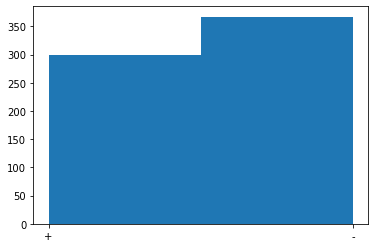

In [40]:
plt.hist(Ycredit, bins=2)

In [41]:
#Binairisation target

Ycredit[Ycredit=='+'] = 1
Ycredit[Ycredit=='-'] = 0
Ycredit = Ycredit.astype(float)


In [42]:
run_classifiers(clfs, Xcredit_num, Ycredit)

Accuracy for NBayes is: 0.716 +/- 0.050
AUC for NBayes is: 0.690 +/- 0.033
precision for NBayes is: 0.832 +/- 0.052
execution time is: 0.048642635345458984 seconds
------------------------------------------- 

Accuracy for CART is: 0.715 +/- 0.047
AUC for CART is: 0.723 +/- 0.036
precision for CART is: 0.683 +/- 0.057
execution time is: 0.09298515319824219 seconds
------------------------------------------- 

Accuracy for ID3 is: 0.736 +/- 0.042
AUC for ID3 is: 0.729 +/- 0.045
precision for ID3 is: 0.698 +/- 0.064
execution time is: 0.1431715488433838 seconds
------------------------------------------- 

Accuracy for MLP is: 0.785 +/- 0.044
AUC for MLP is: 0.765 +/- 0.052
precision for MLP is: 0.816 +/- 0.049
execution time is: 36.655773878097534 seconds
------------------------------------------- 

Accuracy for RF is: 0.782 +/- 0.055
AUC for RF is: 0.782 +/- 0.058
precision for RF is: 0.789 +/- 0.048
execution time is: 2.416154384613037 seconds
----------------------------------------

{'NBayes': GaussianNB(),
 'CART': DecisionTreeClassifier(),
 'ID3': DecisionTreeClassifier(criterion='entropy'),
 'MLP': MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000),
 'RF': RandomForestClassifier(n_estimators=50),
 'KNN': KNeighborsClassifier(),
 'Bagging': BaggingClassifier(n_estimators=50),
 'Adaboost': AdaBoostClassifier()}

### Normalisation des variables continues

#### StandardScaler()

In [43]:
scaler = StandardScaler()
scaler.fit(Xcredit_num)
Xcredit_num_normalise = scaler.transform(Xcredit_num)
run_classifiers(clfs, Xcredit_num_normalise, Ycredit)

Accuracy for NBayes is: 0.716 +/- 0.050
AUC for NBayes is: 0.690 +/- 0.033
precision for NBayes is: 0.832 +/- 0.052
execution time is: 0.05048060417175293 seconds
------------------------------------------- 

Accuracy for CART is: 0.725 +/- 0.048
AUC for CART is: 0.719 +/- 0.041
precision for CART is: 0.675 +/- 0.056
execution time is: 0.09717416763305664 seconds
------------------------------------------- 

Accuracy for ID3 is: 0.734 +/- 0.047
AUC for ID3 is: 0.731 +/- 0.050
precision for ID3 is: 0.695 +/- 0.067
execution time is: 0.12883830070495605 seconds
------------------------------------------- 

Accuracy for MLP is: 0.770 +/- 0.042
AUC for MLP is: 0.761 +/- 0.054
precision for MLP is: 0.789 +/- 0.059
execution time is: 32.92701768875122 seconds
------------------------------------------- 

Accuracy for RF is: 0.778 +/- 0.058
AUC for RF is: 0.787 +/- 0.056
precision for RF is: 0.791 +/- 0.066
execution time is: 2.623600721359253 seconds
-----------------------------------------

{'NBayes': GaussianNB(),
 'CART': DecisionTreeClassifier(),
 'ID3': DecisionTreeClassifier(criterion='entropy'),
 'MLP': MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000),
 'RF': RandomForestClassifier(n_estimators=50),
 'KNN': KNeighborsClassifier(),
 'Bagging': BaggingClassifier(n_estimators=50),
 'Adaboost': AdaBoostClassifier()}

#### MinMaxScaler()

In [44]:
scaler_min_max = MinMaxScaler()
scaler_min_max.fit(Xcredit_num)
Xcredit_num_normalise_minmax = scaler_min_max.transform(Xcredit_num)
run_classifiers(clfs, Xcredit_num_normalise_minmax, Ycredit)

Accuracy for NBayes is: 0.716 +/- 0.050
AUC for NBayes is: 0.690 +/- 0.033
precision for NBayes is: 0.832 +/- 0.052
execution time is: 0.058805227279663086 seconds
------------------------------------------- 

Accuracy for CART is: 0.724 +/- 0.047
AUC for CART is: 0.721 +/- 0.046
precision for CART is: 0.697 +/- 0.053
execution time is: 0.11060094833374023 seconds
------------------------------------------- 

Accuracy for ID3 is: 0.736 +/- 0.048
AUC for ID3 is: 0.732 +/- 0.038
precision for ID3 is: 0.705 +/- 0.067
execution time is: 0.10665392875671387 seconds
------------------------------------------- 

Accuracy for MLP is: 0.770 +/- 0.039
AUC for MLP is: 0.781 +/- 0.038
precision for MLP is: 0.814 +/- 0.039
execution time is: 32.65423512458801 seconds
------------------------------------------- 

Accuracy for RF is: 0.790 +/- 0.064
AUC for RF is: 0.767 +/- 0.045
precision for RF is: 0.803 +/- 0.046
execution time is: 2.830063819885254 seconds
----------------------------------------

{'NBayes': GaussianNB(),
 'CART': DecisionTreeClassifier(),
 'ID3': DecisionTreeClassifier(criterion='entropy'),
 'MLP': MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000),
 'RF': RandomForestClassifier(n_estimators=50),
 'KNN': KNeighborsClassifier(),
 'Bagging': BaggingClassifier(n_estimators=50),
 'Adaboost': AdaBoostClassifier()}

### Utilisation de la totalité de la base originale :

#### Traitement des données manquantes :

In [45]:
Xcredit_cat =  Xcredit[:,[0,3,4,5,6,8,9,11,12]]
#Variables catégorielles
col_cat = [0,3,4,5,6,8,9,11,12]
for col_id in range(len(col_cat)):
  unique_val, val_idx = np.unique(Xcredit_cat[:, col_id], return_inverse=True)
  Xcredit_cat[:, col_id] = val_idx
imp_cat = SimpleImputer(missing_values=0, strategy='most_frequent')
Xcredit_cat[:, range(5)] = imp_cat.fit_transform(Xcredit_cat[:, range(5)])


#Variables numériques
X_num = np.copy(Xcredit[:, [1,2,7,10,13,14]])
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)


#### Traitement de variables catégoriques :

In [46]:
X_cat_bin = OneHotEncoder().fit_transform(Xcredit_cat).toarray()
len(X_cat_bin)

688

#### Construction de votre jeu de données :

In [47]:
X_final = np.concatenate((X_num, X_cat_bin), axis=1)
Ycredit = credit1[:,-1]
Ycredit[Ycredit=='+'] = 1
Ycredit[Ycredit=='-'] = 0
Ycredit = Ycredit.astype(float)
run_classifiers(clfs, X_final,Ycredit)

Accuracy for NBayes is: 0.714 +/- 0.053
AUC for NBayes is: 0.684 +/- 0.065
precision for NBayes is: 0.868 +/- 0.105
execution time is: 0.07596087455749512 seconds
------------------------------------------- 

Accuracy for CART is: 0.798 +/- 0.047
AUC for CART is: 0.799 +/- 0.054
precision for CART is: 0.787 +/- 0.064
execution time is: 0.1484372615814209 seconds
------------------------------------------- 

Accuracy for ID3 is: 0.817 +/- 0.041
AUC for ID3 is: 0.811 +/- 0.040
precision for ID3 is: 0.796 +/- 0.057
execution time is: 0.14345765113830566 seconds
------------------------------------------- 

Accuracy for MLP is: 0.845 +/- 0.040
AUC for MLP is: 0.829 +/- 0.054
precision for MLP is: 0.830 +/- 0.067
execution time is: 45.65630316734314 seconds
------------------------------------------- 

Accuracy for RF is: 0.872 +/- 0.031
AUC for RF is: 0.872 +/- 0.047
precision for RF is: 0.850 +/- 0.052
execution time is: 2.4658868312835693 seconds
-----------------------------------------

{'NBayes': GaussianNB(),
 'CART': DecisionTreeClassifier(),
 'ID3': DecisionTreeClassifier(criterion='entropy'),
 'MLP': MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000),
 'RF': RandomForestClassifier(n_estimators=50),
 'KNN': KNeighborsClassifier(),
 'Bagging': BaggingClassifier(n_estimators=50),
 'Adaboost': AdaBoostClassifier()}

Conclusion:
    On voit que l'utilisation de l'intégralité de l'information, les données numériques et les donnéees catégoriques permettent d'obtenir de meuilleurs performances pour pratiquement tous les modèles.

### III. Apprentissage supervisé sur des données textuelles : Feature engineering et Classification

In [97]:
#Importer les données textuelles
datatext =pd.read_csv(r"C:\Users\ghofr\OneDrive\Bureau\TP-AS\TP AS\SMSSpamCollection.data", sep='\t', header=None,names=['label','texte'])

In [98]:
#data exploration
datatext.head()

,label,texte
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [100]:
datatext.describe()

,label,texte
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [101]:
datatext['label'].unique()
datatext['label'] = datatext['label'].apply(func= lambda y:1 if y == 'spam' else 0)
# no need for X or Y to be arrays
texte_sms = datatext['texte']
classe_sms = datatext['label']

### CountVectorizer

In [102]:
vectorizer = CountVectorizer(min_df=3, stop_words='english')
X = vectorizer.fit_transform(texte_sms)
X1 = X.toarray()
print(len(X1))
print(len(classe_sms))


5572
5572


In [ ]:
run_classifiers(clfs,X1,classe_sms)

Accuracy for NBayes is: 0.865 +/- 0.019
AUC for NBayes is: 0.887 +/- 0.020
precision for NBayes is: 0.498 +/- 0.053
execution time is: 12.02010989189148 seconds
------------------------------------------- 

Accuracy for CART is: 0.972 +/- 0.006
AUC for CART is: 0.932 +/- 0.015
precision for CART is: 0.912 +/- 0.024
execution time is: 444.12999391555786 seconds
------------------------------------------- 

Accuracy for ID3 is: 0.970 +/- 0.006
AUC for ID3 is: 0.920 +/- 0.014
precision for ID3 is: 0.917 +/- 0.017
execution time is: 341.5788824558258 seconds
------------------------------------------- 

Accuracy for MLP is: 0.986 +/- 0.004
AUC for MLP is: 0.951 +/- 0.011
precision for MLP is: 0.989 +/- 0.012
execution time is: 219.112726688385 seconds
------------------------------------------- 

Accuracy for RF is: 0.982 +/- 0.004
AUC for RF is: 0.937 +/- 0.015
precision for RF is: 0.994 +/- 0.008
execution time is: 337.35829496383667 seconds
------------------------------------------- 



## Tf–idf term weighting

In [ ]:
transformer = TfidfVectorizer()

In [ ]:
X2 = transformer.fit_transform(texte)
X2=X2.toarray()
print(len(X2))
print(len(classe_sms))

In [ ]:
run_classifiers(clfs,X2,classe_sms)

## TruncatedSVD

In [ ]:
svd = TruncatedSVD(n_components=5, random_state=1)
X3 = svd.fit_transform(X2)

In [ ]:
run_classifiers(clfs, X3, classe_sms)

## Pipeline

In [ ]:
pipeline = Pipeline(memory=None,steps=[
    ('vect',TCountVectorizer(min_df=3, stop_words='english')),
    ('reduce_dim', TruncatedSVD(n_components=5, random_state=1)),
    ('clf', DecisionTreeClassifier())] )